   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 4.2 MB/s eta 0:00:00
Database ready
Simulated IoT sensor started
Published: {'time': '17:29:59', 'temperature': 22.31, 'humidity': 41.75}


/tmp/ipython-input-4285550369.py:26: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  publisher = mqtt.Client()


Published: {'time': '17:30:01', 'temperature': 25.92, 'humidity': 45.42}
Published: {'time': '17:30:03', 'temperature': 28.93, 'humidity': 46.13}
Published: {'time': '17:30:05', 'temperature': 20.98, 'humidity': 54.99}
Published: {'time': '17:30:07', 'temperature': 25.22, 'humidity': 51.49}
Published: {'time': '17:30:09', 'temperature': 21.28, 'humidity': 48.18}
Published: {'time': '17:30:11', 'temperature': 22.29, 'humidity': 57.93}
Published: {'time': '17:30:13', 'temperature': 20.41, 'humidity': 52.19}
Published: {'time': '17:30:15', 'temperature': 24.68, 'humidity': 49.64}
Published: {'time': '17:30:17', 'temperature': 22.75, 'humidity': 41.46}


/tmp/ipython-input-4285550369.py:57: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  subscriber = mqtt.Client()


Data collection finished


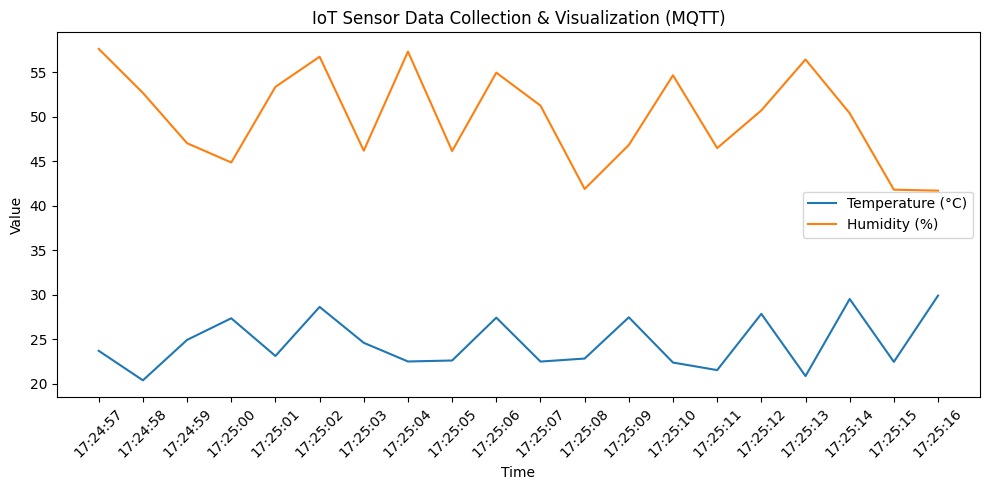

In [2]:
!pip install paho-mqtt
import sqlite3

conn = sqlite3.connect("sensor_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sensor (
    time TEXT,
    temperature REAL,
    humidity REAL
)
""")
conn.commit()

print("Database ready")
import paho.mqtt.client as mqtt
import random
import time
import json
from datetime import datetime

broker = "test.mosquitto.org"
topic = "iot/demo/student123"  # можешь изменить

publisher = mqtt.Client()
publisher.connect(broker, 1883, 60)

print("Simulated IoT sensor started")

for i in range(10):
    data = {
        "time": datetime.now().strftime("%H:%M:%S"),
        "temperature": round(random.uniform(20, 30), 2),
        "humidity": round(random.uniform(40, 60), 2)
    }

    publisher.publish(topic, json.dumps(data))
    print("Published:", data)
    time.sleep(2)

publisher.disconnect()
import paho.mqtt.client as mqtt
import json

def on_message(client, userdata, msg):
    data = json.loads(msg.payload.decode())

    cursor.execute(
        "INSERT INTO sensor VALUES (?, ?, ?)",
        (data["time"], data["temperature"], data["humidity"])
    )
    conn.commit()

    print("Stored:", data)

subscriber = mqtt.Client()
subscriber.connect(broker, 1883, 60)
subscriber.subscribe(topic)
subscriber.on_message = on_message

subscriber.loop_start()
time.sleep(25)   # ждём данные
subscriber.loop_stop()

print("Data collection finished")
import matplotlib.pyplot as plt

cursor.execute("SELECT * FROM sensor")
rows = cursor.fetchall()

times = [row[0] for row in rows]
temps = [row[1] for row in rows]
hums = [row[2] for row in rows]

plt.figure(figsize=(10,5))
plt.plot(times, temps, label="Temperature (°C)")
plt.plot(times, hums, label="Humidity (%)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("IoT Sensor Data Collection & Visualization (MQTT)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
conn.close()